In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [24]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2021)

In [25]:
X_train

array([[0.17648729, 0.36117687, 0.17766568, ..., 0.29553265, 0.2050069 ,
        0.20969435],
       [0.31515926, 0.22421373, 0.30004837, ..., 0.29505155, 0.1539523 ,
        0.16535485],
       [0.22381561, 0.25295908, 0.21346141, ..., 0.37766323, 0.19850187,
        0.10448642],
       ...,
       [0.36580056, 0.40175854, 0.35768088, ..., 0.63024055, 0.42046127,
        0.35655254],
       [0.12423683, 0.24112276, 0.12335015, ..., 0.2790378 , 0.2793219 ,
        0.2834186 ],
       [0.09318946, 0.20459926, 0.10331007, ..., 0.13216495, 0.01714962,
        0.14548078]])

In [26]:
y_train

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,

In [27]:
class LogisticRegression:

    def __init__(self,alpha=0.1,epoch=5000,fit_bias=True,threshold=0.5):
        '''
        alpha: learning rate
        epoch: the numbers of loop on entire dataset
        fit_bias: The bias. It is b in our formula
        threshold：threshold is used as cut-off to determine positive or negative prediction
        '''
        self.alpha = alpha
        self.epoch = epoch
        self.cost_record = []
        self.fit_bias = fit_bias
        self.threshold = threshold

    def predict_proba(self,X_test):
        '''
        X_test: m_test x n 2-D numpy array
        '''
        # If model has bias：We add x_0 = 1
        if self.fit_bias:
            x_0 = np.ones(X_test.shape[0]) # get the test sample m_test
            X_test = np.column_stack((x_0,X_test)) # combine columns. X_test is m_testx(n+1) 
            
        z = np.dot(X_test,self.w) # same as linear regression.X_test: m_testx(n+1); self.w is (n+1)x1, then the dot is m_testx1. m_test is the test sample size
        
        return 1/(1+np.exp(-z)) #sigmoid function. it is m_test x 1
    
    def predict(self,X_test):
        '''
        X_test: m_test x n 2-D numpy array
        '''
        probs = self.predict_proba(X_test) # call the first prediction function
        results = map(lambda x:int(x>self.threshold),probs) # probs is an array. Map fucntion runs the lambda function on all elements in this array
        return np.array(list(results)) # return the array. results is just a map and will not show numbers without using list()
        
    def fit(self,X_train,y_train):
        '''
        X_train: m x n 的 numpy 2-D array
        y_train：1-D array m*1
        '''
        # If model has bias：We add x_0 = 1
        if self.fit_bias:
            x_0 = np.ones(X_train.shape[0])
            X_train = np.column_stack((x_0,X_train))

        # train sample size
        m = X_train.shape[0]
        # number of features, now is actually n+1
        n = X_train.shape[1]
        # Set init coefficients
        self.w = np.ones(n)
        
        # Update the parameter w
        for i in range(self.epoch):
            # calculate the predicted outcome
            z = np.dot(X_train,self.w) # X_train: m_trainx(n+1); self.w is (n+1)x1, then the dot is m_trainx1. m_train is the train sample size
            y_pred = 1/(1+np.exp(-z)) # y_pred is m_train x 1
            # Calculate cost function
            cost = -(np.dot(y_train.T,np.log(y_pred))+
                     np.dot((np.ones(m)-y_train).T,np.log(np.ones(m)-y_pred)))/m
            self.cost_record.append(cost)
            # Update w using gradient decent method
            self.w += (self.alpha/m * np.dot((y_train-y_pred).T,X_train)).T
        
        # save model
        self.save_model()

    # save model function
    def save_model(self):
        np.savetxt("model.txt",self.w)

    # Load model function
    def load_model(self):
        self.w = np.loadtxt('model.txt')

In [28]:
model_1 = LogisticRegression(epoch=60000) 
model_1.fit(X_train,y_train)
y_pred_1 = model_1.predict(X_test)
y_pred_1

array([1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1])

In [29]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [30]:
metrics = dict()
acc_1 = accuracy_score(y_test,y_pred_1)
metrics['Accuracy'] = acc_1
pre_1 = precision_score(y_test,y_pred_1)
metrics['Precision'] = pre_1
rec_1 = recall_score(y_test,y_pred_1)
metrics['Recall'] = rec_1
f1_1 = f1_score(y_test,y_pred_1)
metrics['F1'] = f1_1
auc_1 = roc_auc_score(y_test, model_1.predict_proba(X_test))
metrics['AUC'] = auc_1
df = pd.DataFrame(metrics,index=['model_1'])
pd.set_option('display.unicode.east_asian_width', True)
print(df)

         Accuracy  Precision  Recall        F1       AUC
model_1  0.982456   0.972973     1.0  0.986301  0.998016


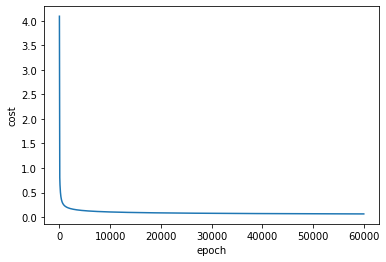

In [31]:
plt.plot(np.arange(model_1.epoch),model_1.cost_record)
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()